In [1]:
import torch
import torch.nn as nn
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
mnist_train=dset.MNIST("", train=True, transform=transforms.ToTensor(),
                       target_transform=None, download=True)
mnist_test=dset.MNIST("", train=False, transform=transforms.ToTensor(),
                       target_transform=None, download=True)

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw




Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw

Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


mnist_train 길이: 60000
mnist_test 길이: 10000
image data 형태: torch.Size([1, 28, 28])
label:  5


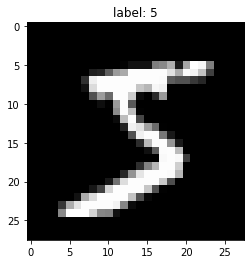

In [4]:
print("mnist_train 길이:", len(mnist_train))
print("mnist_test 길이:", len(mnist_test))

image, label=mnist_train.__getitem__(0)
print("image data 형태:", image.size())
print("label: ", label)

img=image.numpy()
plt.title("label: %d" %label)
plt.imshow(img[0], cmap='gray')
plt.show()

5
torch.Size([1, 28, 28])
5


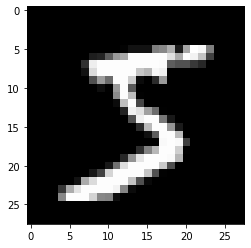

0


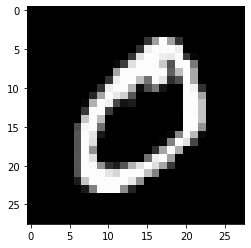

4


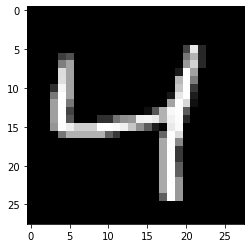

In [5]:
print(mnist_train[0][1])
print(mnist_train[0][0].size())

for i in range(3):
    img=mnist_train[i][0].numpy()
    print(mnist_train[i][1])
    plt.imshow(img[0], cmap='gray')
    plt.show()

torch.Size([1, 1, 28, 28])
5
torch.Size([1, 3, 28, 28])


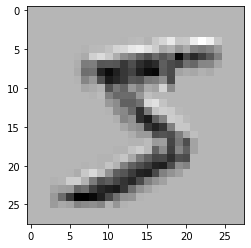

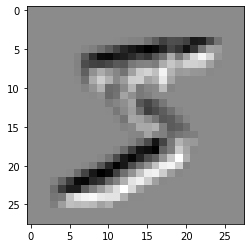

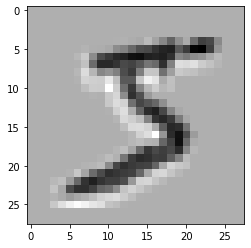

In [8]:
image, label=mnist_train[0]
image=image.view(-1, image.size()[0], image.size()[1], image.size()[2])
print(image.size())

print(label)

conv_layer=nn.Conv2d(in_channels=1, out_channels=3, kernel_size=3, padding=1)
output=conv_layer(Variable(image))
print(output.size())

for i in range(3):
    plt.imshow(output[0, i, :, :].data.numpy(), cmap='gray')
    plt.show()

In [9]:
import numpy as np
import torch.optim as optim

In [10]:
batch_size=16
learning_rate=0.0002
num_epoch=10

In [11]:
train_loader=torch.utils.data.DataLoader(list(mnist_train)[:batch_size*100], 
                                         batch_size=batch_size, shuffle=True, num_workers=2, drop_last=True)
test_loader=torch.utils.data.DataLoader((mnist_test), 
                                         batch_size=batch_size, shuffle=False, num_workers=2, drop_last=True)

In [13]:
class CNN(nn.Module):
  def __init__(self):
      super(CNN, self).__init__()
      self.layer=nn.Sequential(
          nn.Conv2d(1, 16, 5, padding=2),
          nn.ReLU(),

          nn.Conv2d(16, 32, 5, padding=2),
          nn.ReLU(),
          nn.MaxPool2d(2,2),

          nn.Conv2d(32, 64, 5, padding=2),
          nn.ReLU(),
          nn.MaxPool2d(2,2)
      )

      self.fc_layer=nn.Sequential(
          nn.Linear(64*7*7, 100),
          nn.ReLU(),
          nn.Linear(100, 10)
      )

  def forward(self, x):
      out=self.layer(x)
      out=out.view(batch_size, -1)
      out=self.fc_layer(out)
      return out

model=CNN().cuda()

In [14]:
for parameter in model.parameters():
    print(parameter.shape)

torch.Size([16, 1, 5, 5])
torch.Size([16])
torch.Size([32, 16, 5, 5])
torch.Size([32])
torch.Size([64, 32, 5, 5])
torch.Size([64])
torch.Size([100, 3136])
torch.Size([100])
torch.Size([10, 100])
torch.Size([10])


In [16]:
loss_func=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(), lr=learning_rate)

In [19]:
for i in range(num_epoch):
    for j, [image, label] in enumerate(train_loader):
        x=Variable(image).cuda()
        y_=Variable(label).cuda()

        optimizer.zero_grad()
        output=model.forward(x)
        loss=loss_func(output, y_)
        loss.backward()
        optimizer.step()

        if j%50==0:
            print(loss, j, i)

tensor(2.3052, device='cuda:0', grad_fn=<NllLossBackward>) 0 0
tensor(2.0719, device='cuda:0', grad_fn=<NllLossBackward>) 50 0
tensor(0.7265, device='cuda:0', grad_fn=<NllLossBackward>) 0 1
tensor(0.4024, device='cuda:0', grad_fn=<NllLossBackward>) 50 1
tensor(0.4271, device='cuda:0', grad_fn=<NllLossBackward>) 0 2
tensor(0.1371, device='cuda:0', grad_fn=<NllLossBackward>) 50 2
tensor(0.1910, device='cuda:0', grad_fn=<NllLossBackward>) 0 3
tensor(0.5516, device='cuda:0', grad_fn=<NllLossBackward>) 50 3
tensor(0.0395, device='cuda:0', grad_fn=<NllLossBackward>) 0 4
tensor(0.1627, device='cuda:0', grad_fn=<NllLossBackward>) 50 4
tensor(0.0346, device='cuda:0', grad_fn=<NllLossBackward>) 0 5
tensor(0.0383, device='cuda:0', grad_fn=<NllLossBackward>) 50 5
tensor(0.0547, device='cuda:0', grad_fn=<NllLossBackward>) 0 6
tensor(0.2160, device='cuda:0', grad_fn=<NllLossBackward>) 50 6
tensor(0.0161, device='cuda:0', grad_fn=<NllLossBackward>) 0 7
tensor(0.0502, device='cuda:0', grad_fn=<NllLoss

In [20]:
from google.colab import drive
drive.mount('/content/drive')
torch.save(model, './drive/MyDrive/Colab Notebooks/nets/mycnn_model_%d.pkl'%(num_epoch))

Mounted at /content/drive


In [21]:
torch.save(model, './drive/MyDrive/Colab Notebooks/nets/mycnn_model_%d.pkl'%(num_epoch))

In [23]:
try:
    model=torch.load('./drive/MyDrive/Colab Notebooks/nets/mycnn_model_10.pkl')
    print("model restored")
except:
    print("model not restored")

model restored


In [24]:
def ComputeAccr(dloader, imodel):
    correct=0
    total=0

    for j, [imgs, labels] in enumerate(dloader):
        img=Variable(imgs).cuda()
        label=Variable(labels).cuda()

        output=imodel.forward(img)
        _, output_index=torch.max(output, 1)

        total+=label.size(0)
        correct+=(output_index==label).sum().float()
    print("Accuracy of Test Data: {}".format(100*correct/total))

In [26]:
ComputeAccr(test_loader, model)

Accuracy of Test Data: 94.54999542236328
